Gather data using sklearn as helper

In [1]:
import setup # add smarty to path

In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

In [3]:
data = np.c_[california_housing["data"], california_housing["target"]]
names = np.r_[california_housing["feature_names"], california_housing["target_names"]]

Let's create smarty.DataSet from this data and set "MedHouseVal" as out target class

In [4]:
from smarty.datasets import DataSet

ds = DataSet().from_object(data, columns=names)
ds.set_target_classes("MedHouseVal")


First 5 rows of DataSet at 0x1278bb940:
        MedInc           HouseAge         AveRooms         AveBedrms        Population       AveOccup         Latitude         Longitude        MedHouseVal      
     0  8.325200080871582  41               6.984127044677734  1.023809552192688  322              2.555555582046509  37.880001068115234  -122.2300033569336  4.526000022888184  
     1  8.301400184631348  21               6.238137245178223  0.9718804955482483  2401             2.109841823577881  37.86000061035156  -122.22000122070312  3.5850000381469727  
     2  7.257400035858154  52               8.288135528564453  1.073446273803711  496              2.802259922027588  37.849998474121094  -122.23999786376953  3.5209999084472656  
     3  5.643099784851074  52               5.817351818084717  1.073059320449829  558              2.547945261001587  37.849998474121094  -122.25          3.4130001068115234  
     4  3.8461999893188477  52               6.281853199005127  1.0810810327529907 

/Users/user/Desktop/projects/ml/examples/./../smarty/datasets/datasets.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  empty = np.where(col=='')[0]


In [5]:
ds.info()


DataSet at 0x1278bb940
	Rows: 20640
	Cols: 9

	name           	          dtype
	MedInc         	        float32
	HouseAge       	          uint8
	AveRooms       	        float32
	AveBedrms      	        float32
	Population     	         uint16
	AveOccup       	        float32
	Latitude       	        float32
	Longitude      	        float32
	MedHouseVal    	        float32



Split data into training dataset and test dataset with default split_ratio=0.8

In [6]:
from smarty.datasets.utils import train_test_split

ds.batch(32).repeat(True)
train_ds, test_ds = train_test_split(ds)

In [7]:
from smarty.models.linear import LinearRegression

lr = LinearRegression(solver="norm_eq")
lr.fit(train_ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 1 epochs.
Epoch 1/1
	Step 1/1 - mean_squared_error: 0.5284277086684172, 



<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 516/516



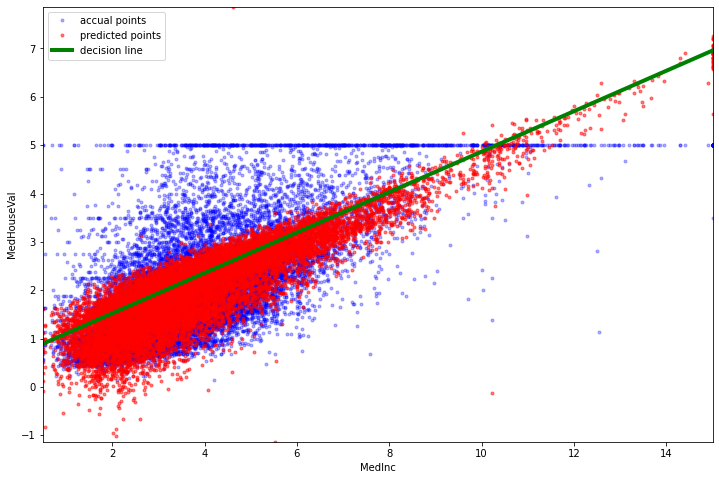

In [8]:
lr.plot(train_ds)

In [9]:
lr.evaluate(test_ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 129/129

mean_squared_error: 0.542189772612099.


{'mean_squared_error': 0.542189772612099}

In [10]:
lr.bias_, lr.coefs_

(array([-36.35057841]),
 array([[ 4.44781456e-01],
        [ 9.40076394e-03],
        [-1.20493644e-01],
        [ 6.61340655e-01],
        [-7.62336482e-06],
        [-4.13918739e-03],
        [-4.14767766e-01],
        [-4.27852190e-01]]))

Let's try to train linear regression with mini-batch gradient descent running for 100 epochs

In [23]:
lr2 = LinearRegression(solver="mbgd")
lr2.fit(train_ds, epochs=20)
lr2.evaluate(test_ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 20 epochs.
Epoch 1/20
	Step 516/516 - mean_squared_error: 1.123313135562176,  

Epoch 2/20
	Step 516/516 - mean_squared_error: 0.9475083825519968, ean_squared_error: 0.9789424732798887, 

Epoch 3/20
	Step 516/516 - mean_squared_error: 0.9085601512122967, 

Epoch 4/20
	Step 516/516 - mean_squared_error: 0.9039413725852071, 

Epoch 5/20
	Step 516/516 - mean_squared_error: 0.9061289562677836, 

Epoch 6/20
	Step 516/516 - mean_squared_error: 0.908384281735389,   - mean_squared_error: 0.9007896237864962, 

Epoch 7/20
	Step 516/516 - mean_squared_error: 0.9098377804219101,  - mean_squared_error: 0.9040906797235003, 

Epoch 8/20
	Step 516/516 - mean_squared_error: 0.9106110865992152, 

Epoch 9/20
	Step 516/516 - mean_squared_error: 0.9109437312559806, 

Epoch 10/20
	Step 516/516 - mean_squared_error: 0.9110213151304768,  - mean_squared_error: 0.9154599760178378, 

Epoch 11/20
	Step 516/516 - mean_squared_error: 0.910960

{'mean_squared_error': 0.8918211068079767}

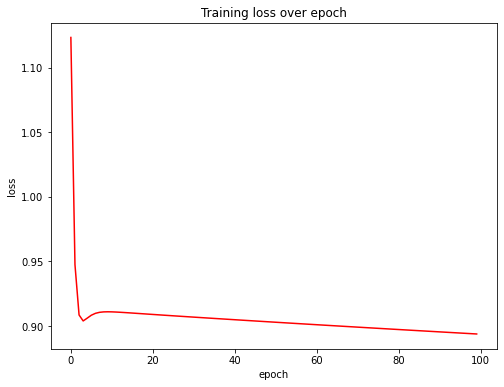

In [12]:
# plot training curves
lr2.plot_training()

In [13]:
lr2.bias_, lr2.coefs_

(array([[0.0001195]]),
 array([[ 1.53965460e-02],
        [ 8.72455003e-03],
        [ 4.83379155e-03],
        [-1.33774906e-04],
        [-5.07604196e-05],
        [-1.91808910e-03],
        [-8.72598986e-06],
        [-1.44586151e-02]]))

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 516/516



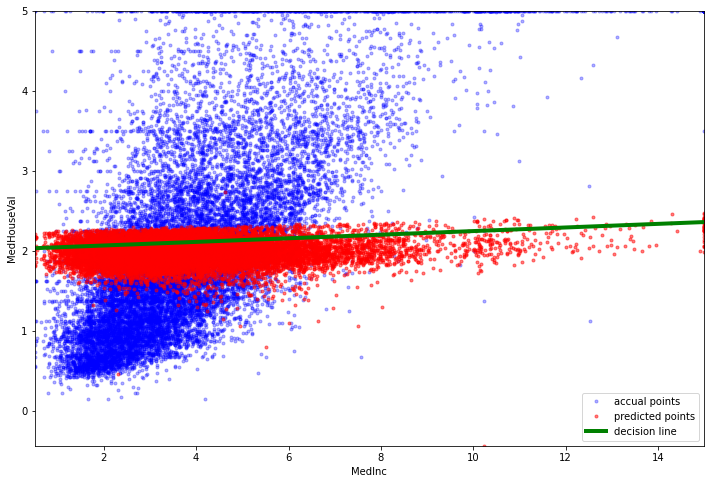

In [14]:
lr2.plot(train_ds)

Compare scores to sklearn's sgd linear model

In [15]:
from sklearn.linear_model import SGDRegressor

lr = SGDRegressor()
lr.fit(ds.get_data_classes(), ds.get_target_classes().ravel())

SGDRegressor()

In [16]:
lr.coef_, lr.intercept_

(array([-1.98649707e+11, -1.18617415e+11,  4.69210899e+10,  1.76764743e+10,
         4.72278313e+10, -1.15037383e+12, -5.06609538e+11,  1.00700045e+12]),
 array([-5.12751034e+09]))

In [17]:
lr.n_iter_

43